# this file is applying random forest to classify attacks on Data/labeled_db.csv Data

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


csv_file = 'Data/labeled_db.csv'

In [7]:
from tabulate import tabulate

def load_data(csv_file):
    """ Load the data """
    data = pd.read_csv(csv_file)
    data = data.drop(['Timestamp'], axis=1)
    print('\nShape of the data:')
    print(data.shape)
    print('\nData description:')
    print(tabulate(data.describe(), headers=data.columns, tablefmt="simple_grid"))
    # X and y of the data, where y is Attack_Type column
    X = data.drop(['Attack_Type'], axis=1)
    y = data['Attack_Type']
    return X, y 

def split_data(X,y):
    """ Splitting the data into training and testing sets """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    print('\nShape after slitting:')
    print(f'X_train: {X_train.shape}')
    print(f'X_test: {X_test.shape}')

    # Standardizing the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test 
    
X, y = load_data(csv_file)
X_train, X_test, y_train, y_test  = split_data(X,y)


Shape of the data:
(5150, 11)

Data description:
┌─────────────┬─────────────────┬──────────────────────┬─────────────┬──────────────────┬──────────────────┬──────────────┬───────────────┬────────────────┬──────────────────┬──────────────────┐
│ CPU_usage   │   Num_processes │   Interrupts_per_sec │   DSK-write │         DSK-read │   RAM-percentage │   Unique_IPs │   Num_Sockets │   Upload_speed │   Download_speed │      Attack_Type │
├─────────────┼─────────────────┼──────────────────────┼─────────────┼──────────────────┼──────────────────┼──────────────┼───────────────┼────────────────┼──────────────────┼──────────────────┤
│ count       │      5150       │           5150       │     5150    │   5150           │         5150     │   5150       │   5150        │       5150     │   5150           │   5150           │
├─────────────┼─────────────────┼──────────────────────┼─────────────┼──────────────────┼──────────────────┼──────────────┼───────────────┼────────────────┼──────────────

In [8]:
# show classification report
def classification_report_print(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("F1: ", f1_score(y_test, y_pred, average='macro'))

# Creating a classifier object
# clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# clf = tree.DecisionTreeClassifier()
# clf = svm.SVC(kernel='linear', C=1)
# clf = svm.SVC(kernel='rbf', gamma=0.7, C=1)
# clf = svm.SVC(kernel='poly', degree=3, C=1)
# clf = svm.SVC(kernel='sigmoid', C=1)
# clf = svm.SVC(kernel='precomputed')
# clf = svm.LinearSVC()
# clf = svm.NuSVC()
# clf = svm.NuSVC(kernel='linear')
# clf = svm.NuSVC(kernel='rbf')
# clf = svm.NuSVC(kernel='poly', degree=3)
clf = tree.DecisionTreeClassifier()  # <guru>, this clf is the best. 

# fit the model
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)
classification_report_print(y_test, y_pred)

                precision    recall  f1-score   support

 Ping of Death       1.00      0.99      1.00       172
     Slowloris       1.00      1.00      1.00       165
     TCP flood       1.00      1.00      1.00       162
http-get flood       0.99      1.00      1.00       180
        normal       1.00      0.99      1.00       177
     syn flood       0.99      1.00      1.00       174

      accuracy                           1.00      1030
     macro avg       1.00      1.00      1.00      1030
  weighted avg       1.00      1.00      1.00      1030

Accuracy:  0.9980582524271845
Precision:  0.9981268087345437
Recall:  0.9980893881662506
F1:  0.9981027123832945


In [9]:
# function to apply ANN
def apply_ann(X_train, X_test, y_train, y_test):
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classification_report_print(y_test, y_pred)

apply_ann(X_train, X_test, y_train, y_test)

                precision    recall  f1-score   support

 Ping of Death       1.00      0.99      1.00       172
     Slowloris       1.00      1.00      1.00       165
     TCP flood       1.00      1.00      1.00       162
http-get flood       0.99      1.00      1.00       180
        normal       0.99      0.99      0.99       177
     syn flood       0.99      0.99      0.99       174

      accuracy                           1.00      1030
     macro avg       1.00      1.00      1.00      1030
  weighted avg       1.00      1.00      1.00      1030

Accuracy:  0.9970873786407767
Precision:  0.9971797156951069
Recall:  0.9971315337601204
F1:  0.9971529368419262


/Users/guru/miniconda/envs/DDoS/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[Text(0.6666666666666666, 0.9375, 'x[8] <= -0.124\ngini = 0.833\nsamples = 4120\nvalue = [708, 689, 681, 696, 644, 702]'),
 Text(0.5, 0.8125, 'x[7] <= 0.77\ngini = 0.75\nsamples = 2732\nvalue = [0, 689, 1, 696, 644, 702]'),
 Text(0.4166666666666667, 0.6875, 'x[8] <= -0.693\ngini = 0.667\nsamples = 2043\nvalue = [0, 0, 1, 696, 644, 702]'),
 Text(0.3333333333333333, 0.5625, 'x[9] <= -0.466\ngini = 0.5\nsamples = 1347\nvalue = [0, 0, 1, 0, 644, 702]'),
 Text(0.25, 0.4375, 'x[7] <= -0.104\ngini = 0.006\nsamples = 646\nvalue = [0, 0, 1, 0, 644, 1]'),
 Text(0.16666666666666666, 0.3125, 'x[8] <= -0.758\ngini = 0.003\nsamples = 645\nvalue = [0, 0, 0, 0, 644, 1]'),
 Text(0.08333333333333333, 0.1875, 'gini = 0.0\nsamples = 640\nvalue = [0, 0, 0, 0, 640, 0]'),
 Text(0.25, 0.1875, 'x[8] <= -0.758\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 0, 0, 4, 1]'),
 Text(0.16666666666666666, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.0\nsamples =

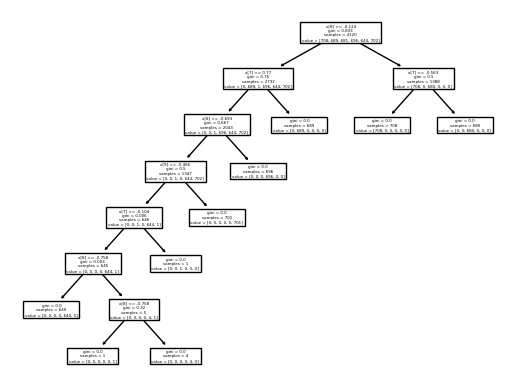

In [10]:
import sklearn
sklearn.tree.plot_tree(clf)

# Workarounds to compute and plot important features

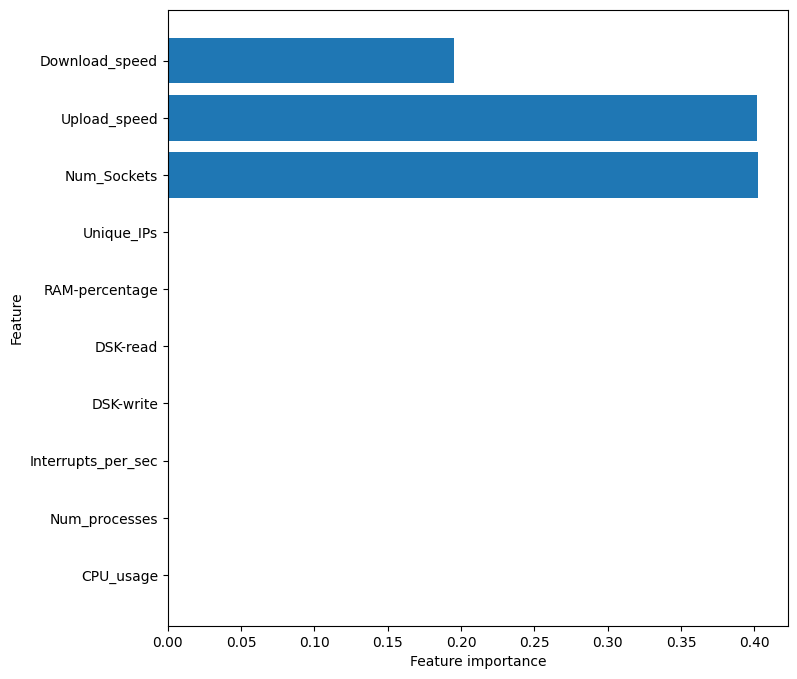

10


In [11]:

def plot_feature_importances(model, X):
    n_features = X.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
    print(n_features)

plot_feature_importances(clf, X)

<AxesSubplot:>

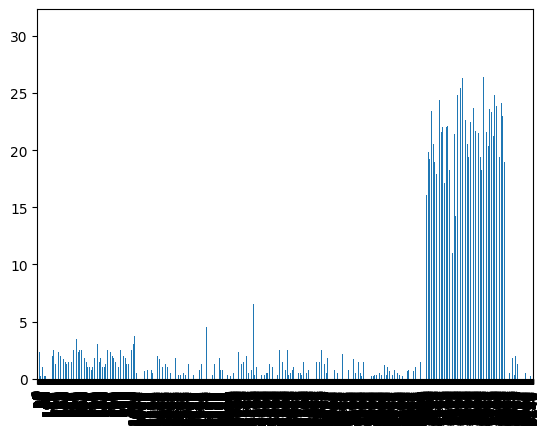

In [14]:
X.CPU_usage.plot.bar()

<AxesSubplot:>

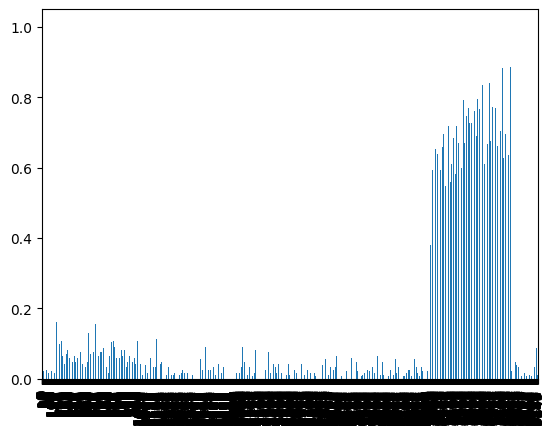

In [15]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

NormalizeData(X['CPU_usage']).plot.bar()

array([[<AxesSubplot:title={'center':'CPU_usage'}>,
        <AxesSubplot:title={'center':'Num_processes'}>,
        <AxesSubplot:title={'center':'Interrupts_per_sec'}>],
       [<AxesSubplot:title={'center':'DSK-write'}>,
        <AxesSubplot:title={'center':'DSK-read'}>,
        <AxesSubplot:title={'center':'RAM-percentage'}>],
       [<AxesSubplot:title={'center':'Unique_IPs'}>,
        <AxesSubplot:title={'center':'Num_Sockets'}>,
        <AxesSubplot:title={'center':'Upload_speed'}>],
       [<AxesSubplot:title={'center':'Download_speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

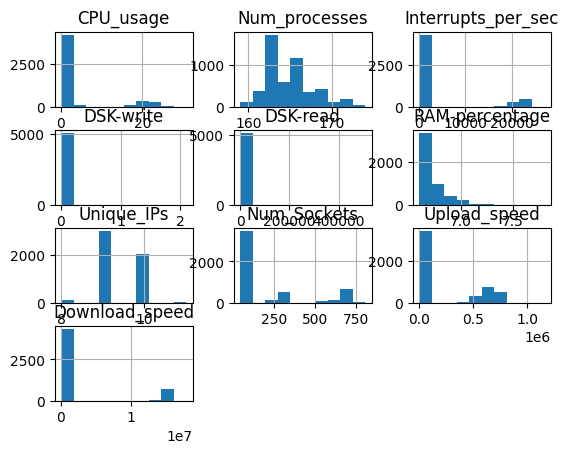

In [ ]:
X.hist()

<AxesSubplot:>

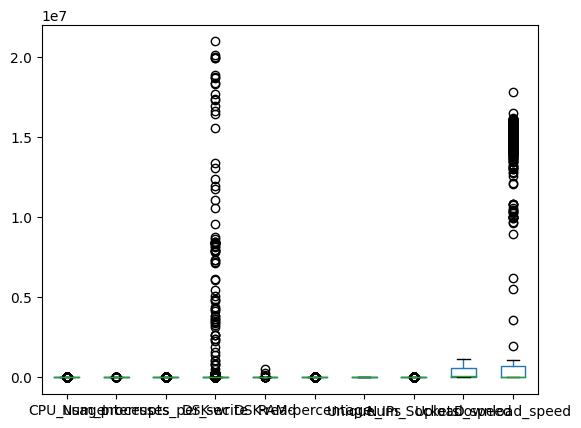

In [16]:
# plot pandas description in box plot 
# for x in X.columns:
#     X[x].plot(kind='box', layout=(8,8))
#     plt.show()
X.plot.box()